**Анализ приложения Procrastinate Pro+**

***Необходимо*** разобраться в причинах убытков компании и помочь ей выйти в плюс.

***Цель исследования:***

1) выяснить откуда приходят пользователи и какими устройствами они пользуются,

2) определить сколько стоит привлечение пользователей из различных рекламных каналов и когда эти расходы окупаются;

3) вычислить- сколько денег приносит каждый клиент и какие факторы мешают привлечению клиентов,

4) подвести итог

***Ход исследования:*** Данные получены из файлов: visits_info_short.csv, orders_info_short.csv, costs_info_short.csv. 

Перед началом работы я выполню предобработку данных. Далее задам функции для расчёта и анализа LTV, ROI, удержания и конверсии и выполню исследовательский анализ пользовательских профилей в разрезе стран, устройств и рекламных источников. Проанализирую расходы на маркетинг и оценю окупаемость рекламы. В конце работы я выделю причины неэффективности привлечения пользователей и сформулирую рекомендации для отдела маркетинга.

Подробные шаги прописаны ниже в проекте
    

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import plotly.express as px
from datetime import datetime, timedelta

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

##### Общая инфо

In [3]:
visits.info()
visits.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

Пропусков в таблице с визитами нет, но есть несоответствие типов данных значениям в колонках  Session Start и Session End. Так же будет выполнена проверка на наличие дубликатов и приведение названий колонок к общему виду.

In [4]:
orders.info()
orders.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


User Id     0
Event Dt    0
Revenue     0
dtype: int64

Пропусков в таблице с заказами нет, но есть несоответствие типов данных значениям в колонке Event Dt. Так же будет выполнена проверка на наличие дубликатов и приведение названий колонок к общему виду.

In [5]:
costs.info()
costs.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


dt         0
Channel    0
costs      0
dtype: int64

Пропусков в таблице с расходами нет, но есть несоответствие типов данных значениям в колонке dt. Так же будет выполнена проверка на наличие дубликатов и приведение названий колонок к общему виду.

##### Обработка данных

###### Таблица visits

In [6]:
#напишу функцию, которая будет убирать очевидные дубликаты и приводить наименования колонок к общему виду
def prep(df):
    df = df.drop_duplicates()
    df.columns = df.columns.str.lower().str.replace(" ", "_", regex=True)

    return df

In [7]:
visits = prep(visits)  

#преобразую колонки со временем
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

#и вызову общую инфу для проверки, что все изменения отображены
visits.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 16.6+ MB


###### Таблица orders

In [8]:
#вызову фунцкию выше, используя новый аргумент
orders = prep(orders)
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 MB


###### Таблица costs

In [9]:
#вызову фунцкию выше, используя новый аргумент
costs = prep(costs)
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 56.2+ KB


**Вывод:** данные готовы к анализу:
- пропусков нет
- дубликаты удалены
- типы данных приведены к корректному виду
- колонки переименованы

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

##### Расчет  Retention Rate (удержание) 

###### Функция get_profiles

Для того, чтобы посчитать удержание пользователя, выделю время первого посещения через фунцию get_profiles() 

In [10]:
def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

profiles = get_profiles(visits, orders, costs)

profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


###### Функция get_retention()

In [11]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#retention_raw, retention, retention_history = get_retention(profiles, visits, datetime(2019, 6, 13).date(), 10, dimensions =['channel'])

#retention_raw, retention, retention_history

функция работает, если задать пробные данные (сейчас закомментирую их), позднее мы к ней вернемся, чтобы задать корректный период для анализа
Далее зададим функцию для визуализации удержания

##### Расчет конверсии пользователей в покупателей

###### Функция get_conversion()

Функцию для подсчета конверсии получим из функции удержания, немного ее доработав, т.к. там уже заданы все основные алгоритмы создания таблиц

In [12]:
def get_conversion(profiles, purchases, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    #purchases['event_dt'] = pd.to_datetime(purchases['event_dt'])
    
    first_purchases  = (purchases.sort_values(by = ['user_id', 'event_dt']) #выделяю первую покупку
                        .groupby('user_id')
                        .agg({'event_dt':'first'})
                        .reset_index())
    
    result_raw = result_raw.merge(first_purchases[['user_id', 'event_dt']], on='user_id', how='left')
        
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days  #лайфтайм каждой покупки
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
    
    #напишу функцию для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dimensions, horizon_days):
        result = df.pivot_table(index=dimensions, columns='lifetime', values='user_id', aggfunc='nunique')  #таблица конверсии
        result = result.fillna(0).cumsum(axis = 1) #накопление считаем для каждой строки
        cohort_sizes = (df.groupby(dimensions)
                        .agg({'user_id': 'nunique'})
                        .rename(columns={'user_id': 'cohort_size'}))
        result = cohort_sizes.merge(result, on=dimensions, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        result['cohort_size'] = cohort_sizes
        return result
    
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)      #таблица конверсии
    
    if 'cohort' in dimensions: 
        dimensions = []
        
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)  #таблица динамики конверсии
    
    return result_raw, result_grouped, result_in_time 

#conversion_raw, conversion, conversion_history = (get_conversion(profiles, orders, datetime(2019, 5, 13).date(), 
#                                                                 6, dimensions=[]))

#conversion_raw, conversion, conversion_history                        

##### Расчет LTV и ROI 

###### Функция get_ltv()

Функцию для подсчета выручки на пользователя (LTV) получим все из той же функции удержания, немного ее доработав
Так же здесь сразу добавим расчет для ROI(возврат на инвестиции). Его получим, разделив LTV на CAC(расходы на рекламу).

In [13]:
def get_ltv(
    profiles, 
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date          # исключаем пользователей, не «доживших» до горизонта анализа
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
   
    result_raw = result_raw.merge(                            # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    result_raw['lifetime'] = (                               #добавляем лайфтайм
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет                                
    if len(dimensions) == 0:                               
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dimensions, horizon_days):

        result = df.pivot_table(
            index=dimensions,
            columns='lifetime',
            values='revenue',  
            aggfunc='sum',
        )

        result = result.fillna(0).cumsum(axis=1)       

        cohort_sizes = (
            df.groupby(dimensions)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        result = cohort_sizes.merge(result, on=dimensions, how='left').fillna(0)   # объединяем размеры когорт и таблицу выручки

        result = result.div(result['cohort_size'], axis=0)
 
        result = result[['cohort_size'] + list(range(horizon_days))]
 
        result['cohort_size'] = cohort_sizes
        
    # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dimensions].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dimensions)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
#    profiles, 
#    orders,
#    datetime(2019, 5, 13).date(), 
#    6,
#    dimensions=[])

#roi_history


##### Визуализация полученных выше метрик

###### Функция filter_data() -  для сглаживания фрейма

In [14]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

###### Функция plot_retention() -  для визуализации удержания

Зададим функцию удержания с рандомными параметрами, чтобы проверить, что все работает корректно и наши графики строятся, как мы ожидаем.

In [15]:
#retention_raw, retention, retention_history = get_retention(profiles, visits, datetime(2019, 6, 13).date(), 
#                                                            10, dimensions =['channel'])


In [16]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))
    
    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#plot_retention(retention, retention_history, 7) 

###### Функция plot_conversion() - для визуализации конверсии

Зададим функцию конверсии с рандомными параметрами, чтобы проверить, что все работает корректно и наши графики строятся, как мы ожидаем.

In [17]:
#conversion_raw, conversion, conversion_history = (get_conversion(profiles, orders, datetime(2019, 7, 13).date(), 
#                                                              10, dimensions=[]))
                       

In [18]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 
    
#plot_conversion(conversion, conversion_history, 7)

###### Функция plot_ltv_roi() - для визуализации выручки и окупаемости инвестиций

Зададим функцию LTV и ROI с рандомными параметрами, чтобы проверить, что все работает корректно и наши графики строятся, как мы ожидаем.

In [19]:
#ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
#    profiles, 
#    orders,
#    datetime(2019, 6, 13).date(), 
#    10,
#    dimensions=[])



In [20]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 
    
#plot_ltv_roi(ltv, ltv_history, roi, roi_history, 7)

В данном шаге мы задали функции для построения таблиц и визуализации различных метрик, которые будем анализировать далее:
    
 - конверсия пользователей в покупателей
 - удержание пользователя после регистрации
 - получение выручки от покупателя
 - окупаемость инвестиций (плата за рекламу vs привлеченный клиент)

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

##### Профиль пользователя (даты привлечения)

Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [21]:
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [22]:
prof_min = profiles['dt'].min()
prof_max = profiles['dt'].max()

prof_data_min = (profiles
             .query('dt == @prof_min')
             .pivot_table(index = 'dt', values = 'user_id', aggfunc={'user_id':'nunique'})
                 .rename(columns={'user_id':'total_users'}))
prof_data_min

prof_data_max = (profiles
             .query('dt == @prof_max')
             .pivot_table(index = 'dt', values = 'user_id', aggfunc={'user_id':'nunique'})
                 .rename(columns={'user_id':'total_users'}))
prof_data_min

,total_users
dt,
2019-05-01,909


In [23]:
prof_data_max

,total_users
dt,
2019-10-27,1087


In [24]:
print('Самая ранняя дата привлечения пользователей - ', profiles['dt'].min())
print('Самая поздняя дата привлечения пользователей - ', profiles['dt'].max())

Самая ранняя дата привлечения пользователей -  2019-05-01
Самая поздняя дата привлечения пользователей -  2019-10-27


Впервые пользователей привлекли 1 мая 2019 года, ими стали 909 человек.
Последнее привлечение пользователей состоялось 27 октября того же года - 1087 чел.
Можно предположить, что темп привлечения и заинтересованности вырос, т.к. к концу периода наших данных намного больше пользователей было привлечено. Возможно, реклама делает свое дело верно.

В дальнейшем, мы будем анализировать данные, считая, что сейчас 1 ноября и анализировать будем с горизонтом анализа 14 дней. Так что привлечения от 1 мая попадут в анализ, а от 27 октября - нет, т.к. такие пользователи не успеют пробыть в приложении 14 дней к 1 ноября.

##### Детализация по странам

Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [25]:
countries = (profiles.pivot_table(index='region', values='user_id', aggfunc={'user_id':'nunique'})
             .sort_values(by='user_id', ascending=False)).rename(columns={'user_id':'total_users'})

x = (profiles.query('payer == True')
     .pivot_table(index='region', values='user_id', 
                  aggfunc={'user_id':'nunique'})).rename(columns={'user_id':'payers'})

countries = countries.merge(x, on = 'region')


countries['%_total'] = round((countries['total_users'] / (countries['total_users'].sum()))*100,2)
countries['%_payers'] = round((countries['payers'] / (countries['total_users']))*100,2)
countries = countries.sort_values(by='%_payers', ascending=False).reset_index()

countries

,region,total_users,payers,%_total,%_payers
0,United States,100002,6902,66.66,6.90
1,Germany,14981,616,9.99,4.11
2,UK,17575,700,11.72,3.98
3,France,17450,663,11.63,3.80


Лидирует США - именно оттуда пришло более 6.9% всех пользователей, которые когда-то что-то купили в приложении.
Им немного уступают остальные страны - но они не сильно отличаются от значения друг друга -  показатели колеблются в районе 3-4% от популяции купивших что-нибудь пользователей.

При этом, клиенты США составляют 66% от всех популяции клиентов, но покупают из них только 7%. Конверсия выглядит очень маленькой. Стоит разобраться с этим подробнее.

##### Детализация по устройствам клиентов

Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [26]:
devices = (profiles.pivot_table(index='device', values='user_id', aggfunc={'user_id':'nunique'})
             .sort_values(by='user_id', ascending=False))

y = (profiles.query('payer == True')
     .pivot_table(index='device', values='user_id', 
                  aggfunc={'user_id':'nunique'})).rename(columns={'user_id':'payers'})
devices = devices.merge(y, on = 'device').rename(columns={'user_id':'total_users'})

devices['%_total'] = round((devices['total_users'] / (devices['total_users'].sum()))*100,2)
devices['%_payers'] = round((devices['payers'] / (devices['total_users']))*100,2)

devices = devices.sort_values(by='%_payers', ascending=False).reset_index()

devices

,device,total_users,payers,%_total,%_payers
0,Mac,30042,1912,20.03,6.36
1,iPhone,54479,3382,36.32,6.21
2,Android,35032,2050,23.35,5.85
3,PC,30455,1537,20.30,5.05


Больше всего покупок было совершено с Макбука - таких пользователей около 6.36% от всей популяции платящих пользователей.
Ему незначительно уступают все остальные девайсы - Андроид, айфон и ПК - их доля почти равна друг другу - около 5-6%

При этом видно, что доля пользователей на Маке самая маленькая из всех пользователей, но с самыми большими продажами, что положительное явление. А вот с Айфоном наоборот - самая большая популяция пользователей и такой низкий уровень покупателей.

##### Детализация по рекламным источникам и каналам привлечения

Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [27]:
ads = (profiles.pivot_table(index='channel', values='user_id', aggfunc={'user_id':'nunique'})
             .sort_values(by='user_id', ascending=False))

z = (profiles.query('payer == True')
     .pivot_table(index='channel', values='user_id', 
                  aggfunc={'user_id':'nunique'})).rename(columns={'user_id':'payers'})
ads = ads.merge(z, on = 'channel').rename(columns={'user_id':'total_users'})

ads['%_total'] = round((ads['total_users'] / (ads['total_users'].sum())*100),2)
ads['%_payers'] = round((ads['payers'] / (ads['total_users'])*100),2)

ads= ads.sort_values(by='%_payers', ascending=False).reset_index()

ads

,channel,total_users,payers,%_total,%_payers
0,FaceBoom,29144,3557,19.43,12.20
1,AdNonSense,3880,440,2.59,11.34
2,lambdaMediaAds,2149,225,1.43,10.47
3,TipTop,19561,1878,13.04,9.60
4,RocketSuperAds,4448,352,2.97,7.91
5,WahooNetBanner,8553,453,5.70,5.30
6,YRabbit,4312,165,2.87,3.83
7,MediaTornado,4364,156,2.91,3.57
8,LeapBob,8553,262,5.70,3.06
9,OppleCreativeMedia,8605,233,5.74,2.71


Статистика показывает, что больше всего покупателей пришло через рекламный источник под названием FaceBoom - более 12% из всех пришедщих через этот канал.

Далее идут более привлекательные на мой взгляд каналы - lambdaMediaAds и AdNonSense - их маркетологи отлично стимулируют привлечение пользователей, желающих что-то купить - занимают они всего до 3% от всех пользователей каждый, но при этом целых 10-11% от всех купивших. Почти тот же уровень, что и у FaceBoom, но у него популяция пользователей выше в несколько раз.

Хуже всего привлекают покупателей TipTop -  по нему одно из максимальных значений пришедших пользователей, но не самые высокие доли покупателей.

Из Органически пришедших 37% пользователей только 2% решаются на покупки в приложении.


### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

##### Общая сумма расходов на маркетинг

In [32]:
round(costs['costs'].sum(),2)

105497.3

#####  Сколько денег было вложено в каждый источник?

In [33]:
costs_total = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
costs_total['%'] = round((costs_total['costs'] / (costs_total['costs'].sum()))*100,2)

costs_total

,costs,%
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


Более половины от всех вложений в рекламу приходится на канал TipTop, далее идет знакомый нам FaceBoom, через который пришло больше всего покупателей. 

Остальные каналы были мало проспонсированы - менее 5% затрат приходится на них

##### Визуализация расходов по каждому источнику в динамике

###### Динамика изменения расходов во времени по неделям по каждому источнику

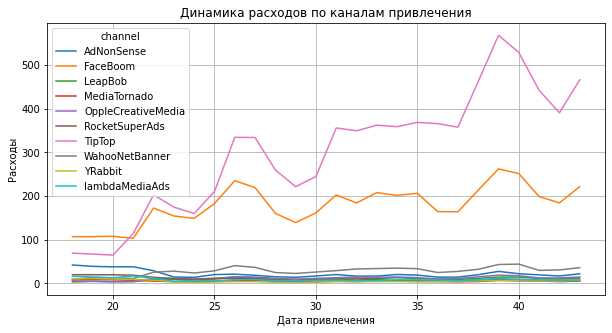

In [34]:
ad_week = costs
ad_week['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
ad_week.pivot_table(
    index='week', columns='channel', values='costs', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Расходы')
plt.xlabel('Дата привлечения')
plt.title('Динамика расходов по каналам привлечения')
plt.show()


Как и выяснили ранее, всего 2 канала выбиваются из общей группы - это Тип-Топ и ФейсБум. Примерно на 38-й неделе года виден скачок на графике по вложениям, вероятно, в эту неделю была выпущена весьма затратная рекламная кампания.

###### Динамика изменения расходов во времени по месяцам по каждому источнику

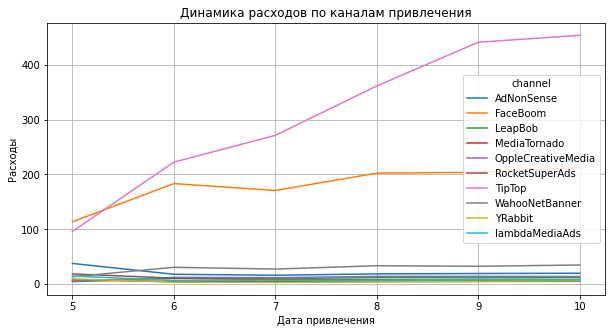

In [35]:
ad_month = costs
ad_month['month'] = pd.to_datetime(costs['dt']).dt.month
ad_month.pivot_table(
    index='month', columns='channel', values='costs', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Расходы')
plt.xlabel('Дата привлечения')
plt.title('Динамика расходов по каналам привлечения')
plt.show()

Оказывается, 40-й неделе года соответствует период сентябрь-октябрь. Именно тогда были понесены максимальные затраты на рекламу

######  (CAC) для каждого источника

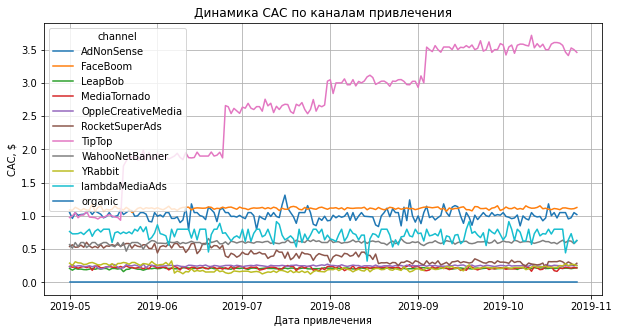

In [37]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [38]:
profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean'
).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Стоимость привлечения клиентов (или САС) наиболее высокая у канала Тип-Топ, что неудивительно, т.к. именно этот канал получил больше всего инвестиций, но при этом привел не максимальное кол-во клиентов. Именно поэтому кривая находится выше всех остальных. Кривые остальных каналов рекламы +- стабильно двигаются от месяца к месяцу.При этом organic находится на 0, т.к. эти пользователи пришли бесплатно, не от рекламы.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

###### Окупаемость рекламы

Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Затраты на привлечение органических пользователей нулевые, поэтому они всегда окупаются. Их мы исключаем из анализа

**Момент анализа** - 1 ноября 2019

**Горизонт анализа** = 14 дней

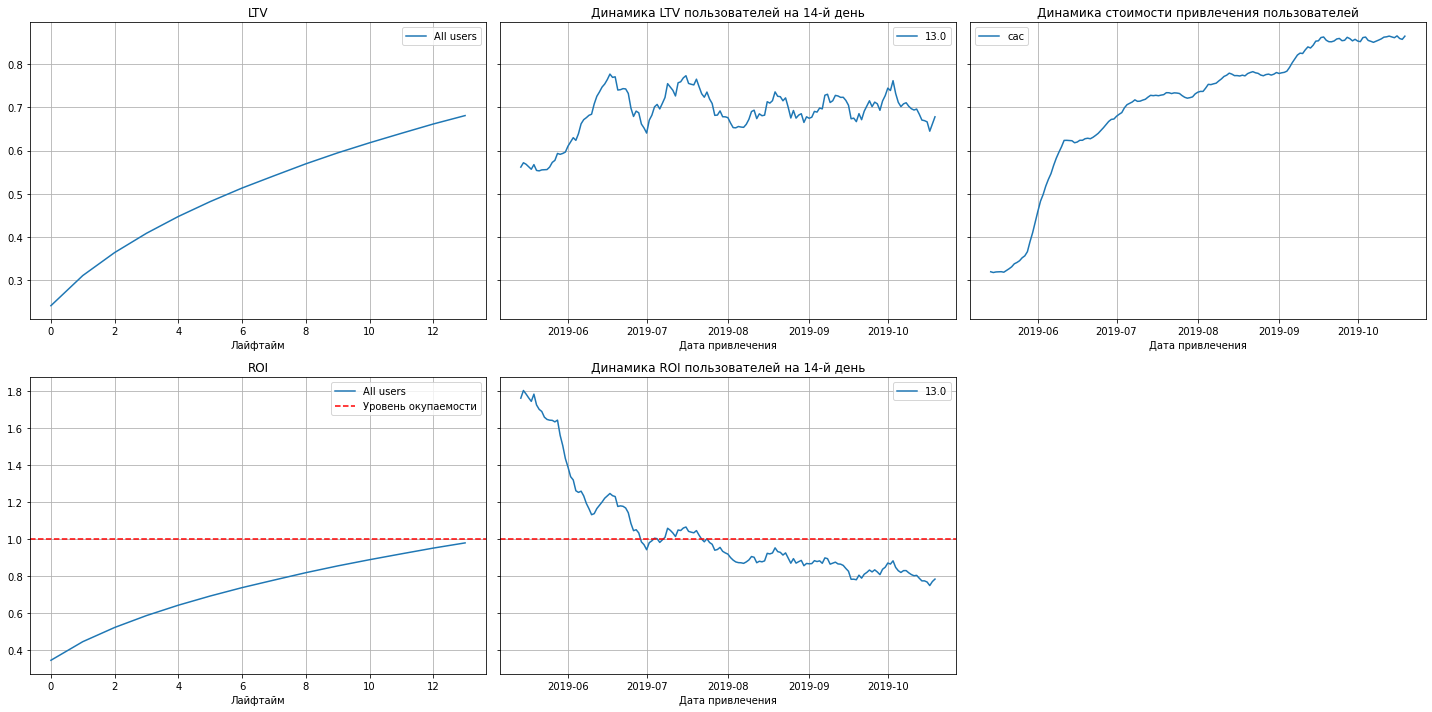

In [39]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, 
    orders,
    datetime(2019, 11, 1).date(), 
    14,
    dimensions=[])

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

In [40]:
# Код ревьюера
profiles = profiles.query('channel != "organic"')

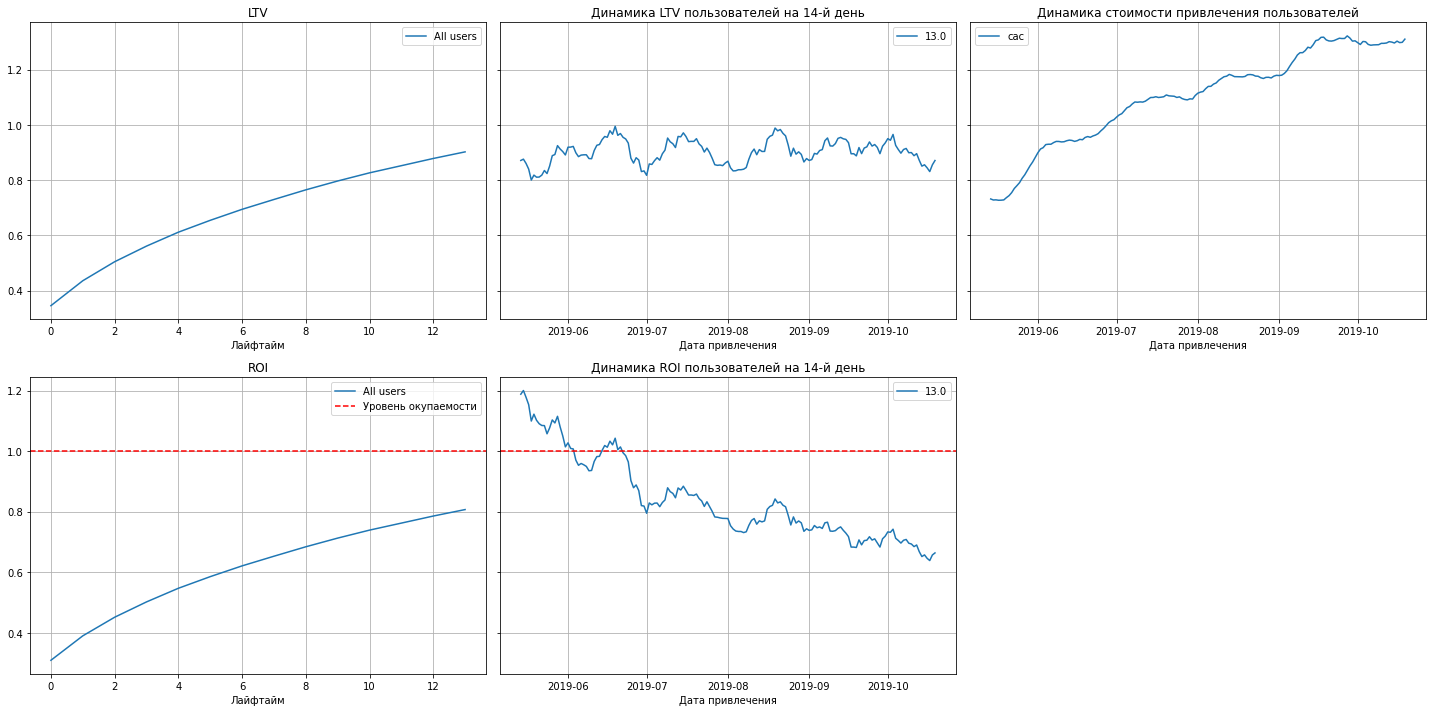

In [41]:
# Код ревьюера
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, 
    orders,
    datetime(2019, 11, 1).date(), 
    14,
    dimensions=[])

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Какие первоначальные выводы можно сделать по полученным графикам:

- наибольшая выручка (показатель LTV) зафиксирована на 14-ый день лайфтайма клиента в периоде с июня по август 2019 г, а пользователи, привлеченные в мае 2019 г - судя по всему наименее прибыльные
- стоимость привлечения существенно изменилась с июня по июль, и дальше постепенно росла
- в целом, реклама приблизилась к метке окупаемости, чтобы ее пересечь, ближе к 12-13 дню лайфтайма пользователя
- окупаемость вложений на 14-ый день выше всего была с мая по июнь 2019 г и низкая после июля, вероятно, стоит поработать с удержанием пользователей.

###### Конверсия и удержание пользователей

Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

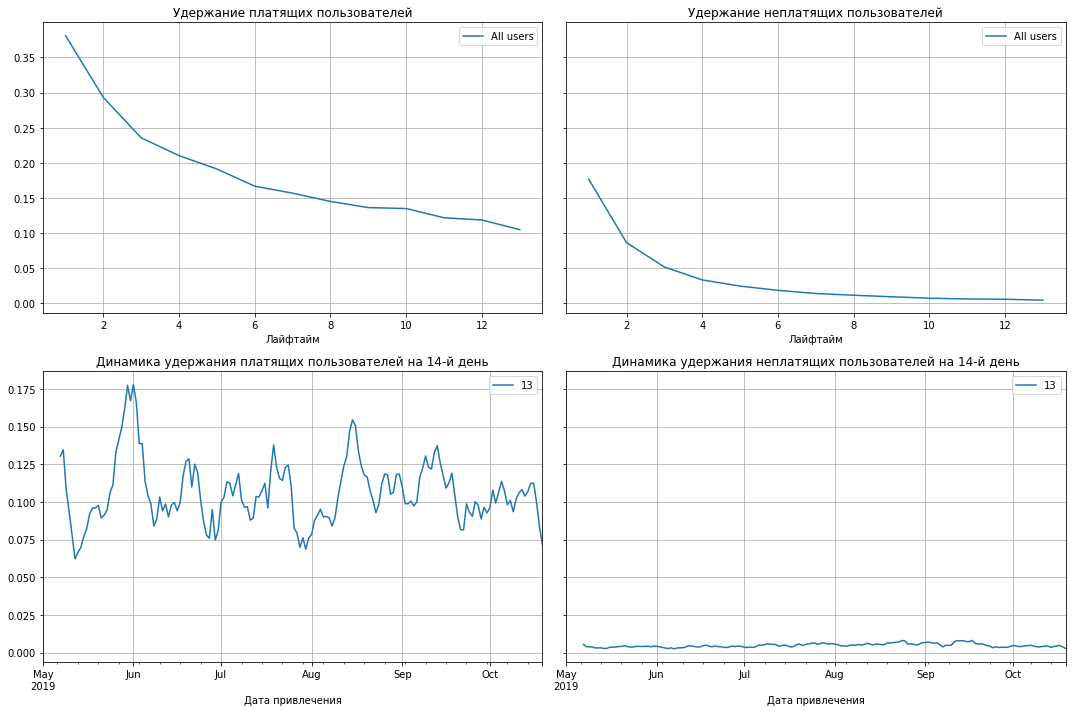

In [42]:
retention_raw, retention, retention_history = get_retention(profiles, visits, datetime(2019, 11, 1).date(), 
                                                            14, dimensions =[])
plot_retention(retention, retention_history, 14) 


График показывает, что неплатящие пользователи быстрее покидали приложение, чем платящие, что ожидаемо

К 14-му же дню неплатящие пользователи почти отсутствовали за весь период анализа, слишком долго такие клиенты не задерживаются, стоит их стимулировать чем-то другим, чтобы они оставались в приложении, либо менять стратегии рекламных кампаний и стимулировать их на покупки.



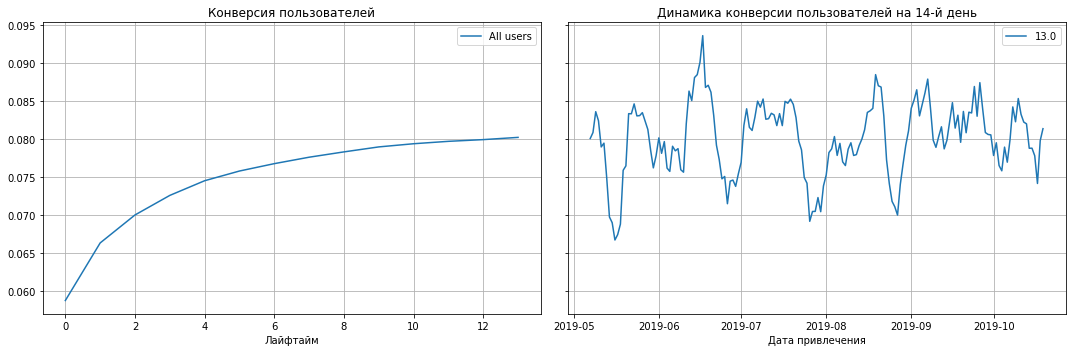

In [43]:
conversion_raw, conversion, conversion_history = (get_conversion(profiles, orders, datetime(2019,11, 1).date(), 
                                                             14, dimensions=[]))
                       
plot_conversion(conversion, conversion_history, 14) 

В основном, пользователи активно конвертировались в покупателей начиная с 6-го дня. Это логично - пользователи успели попользоваться приложением почти неделю и смогли оценить, нужно ли им приложение и хотят ли они в нем совершать покупки.

Максимальная конверсия на 14-ый день была с июня по июль 2017, что показывает нам и график LTV.

###### Окупаемость рекламы по устройствам

Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

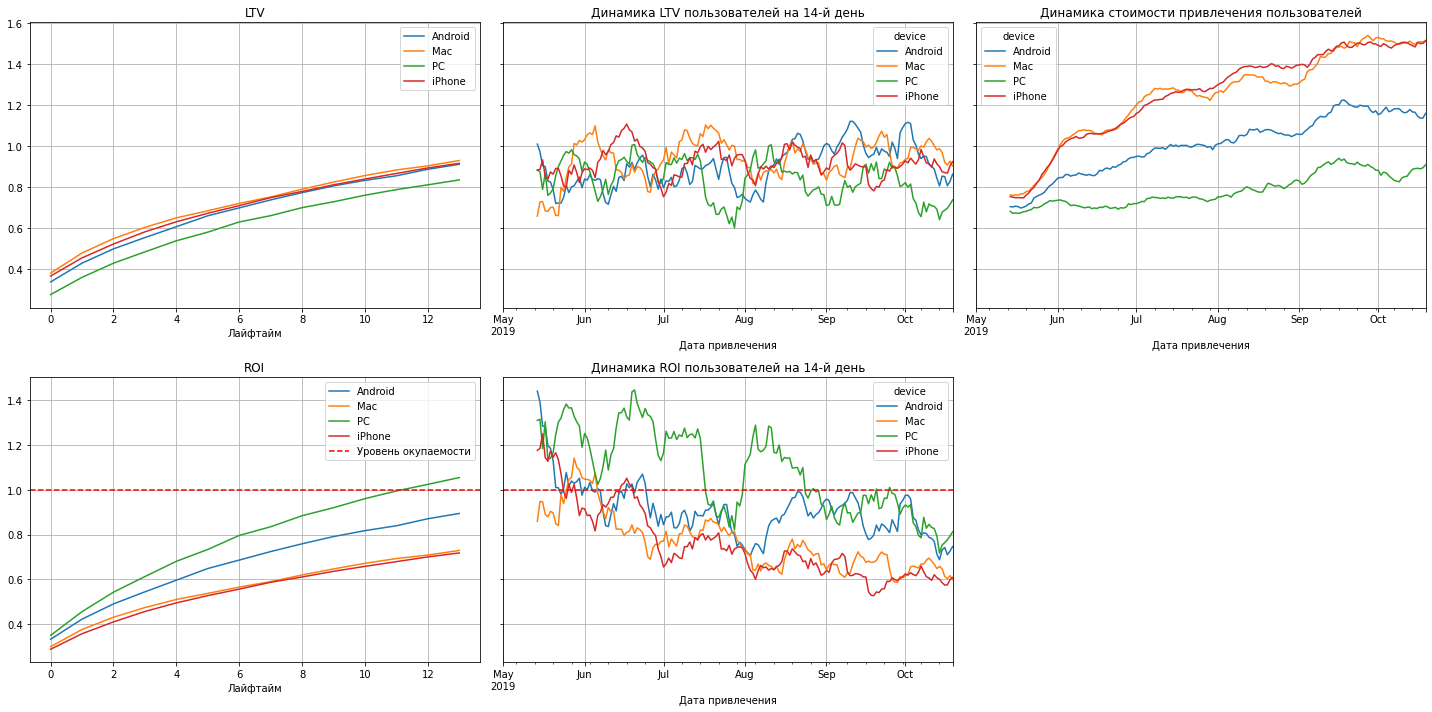

In [44]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, 
    orders,
    datetime(2019, 11, 1).date(), 
    14,
    dimensions=['device'])

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Пользователи почти со всех устройств приносили одинаковый уровень выручки, однако, пользователи Айфон немного прибыльнее остальных.

Так же в тот же период с июня по июль именно с айфона было совершено больше всего покупок. При этом, стоимость привлечения таких пользователей немного выше , чем пользователей других устройств. Вероятно, есть пробный бесплатный период, который составляет стабильно от 7 до 14 дней, после которого клиент принимает решение о покупке подписки


Реклама успевает окупаться за 2 недели только по 2-м устройствам - ПК и Андроид. Их пользователи стоят меньше всего по привлечению, но и приносят самый маленький размер выручки.

Максимальная окупаемость на 14-ый день так же характера все-таки для пользователей с ПК, хотя в середине мая лидировали андроиды, но к осени окупаемость  стала сильно снижаться и даже не всегда реклама была окупаема. Стоит проверить работу приложение на данной платформе.

###### Окупаемость рекламы по странам

Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

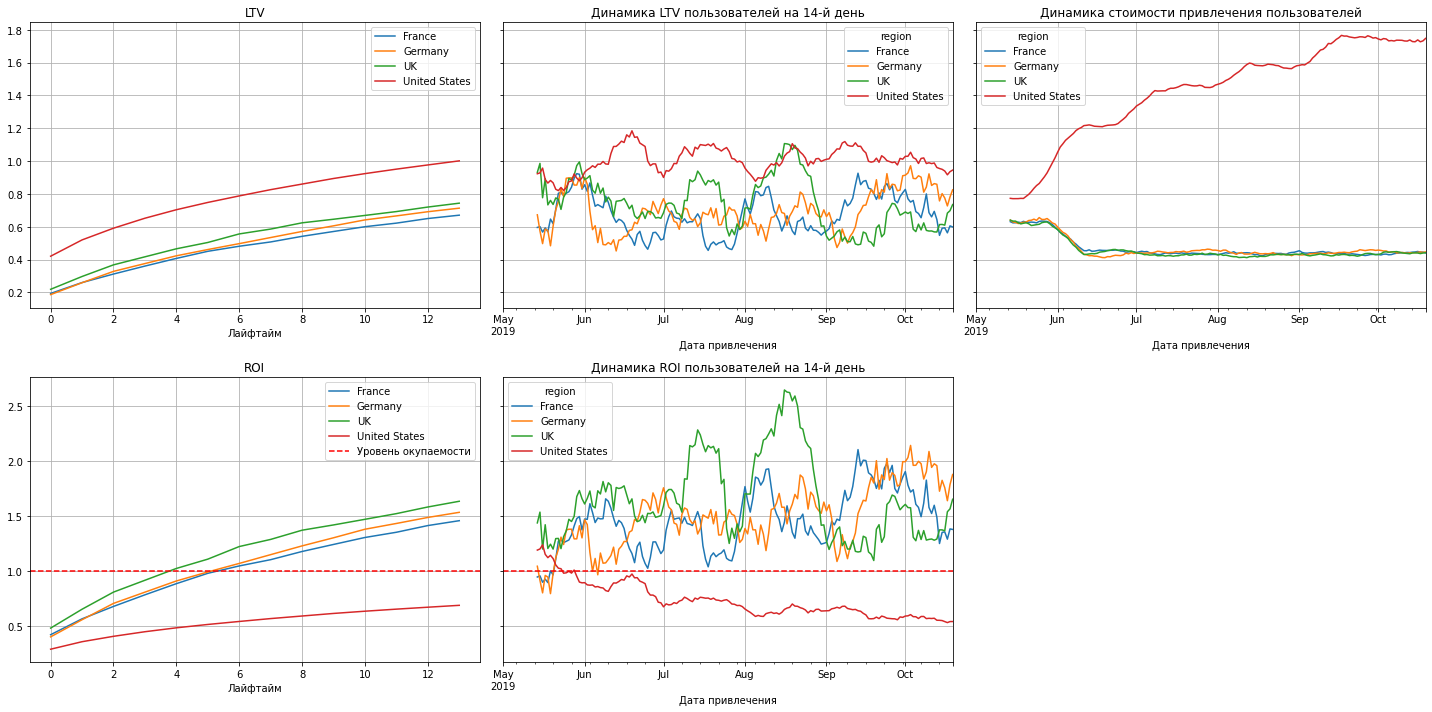

In [45]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, 
    orders,
    datetime(2019, 11, 1).date(), 
    14,
    dimensions=['region'])

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Наиболее высокий уровень выручки получен от пользователей с США, причем здесь так же наблюдается всплеск в июне-июле.

Стоимость привлечения пользователей США выглядит чрезмерно высокой по сравнению с привлечением пользователей из других стран - несмотря на то, что выручка по ним выше всех, такая реклама совсем не окупается за 2 недели. Стоит срочно обратить внимание на вложенные средства и способ привлечения клиентов из США - самые дорогие клиенты, вложенные средства по которым не окупаются. Нужно либо пересмотреть рекламную кампанию, либо стимулировать их на большее совершение покупок

Реклама окупается во всех странах кроме США, но здесь лидируют пользователи UK.

Максимальная окупаемость на 14-ый день так же характера для пользователей с UK с тремя всплесками. Окупаемость пользователей USA к 14-му дню была положительной только в июне-июле , а после этого периода уже не смогла достичь такого же уровня. 


###### Окупаемость рекламы по рекламным каналам

Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

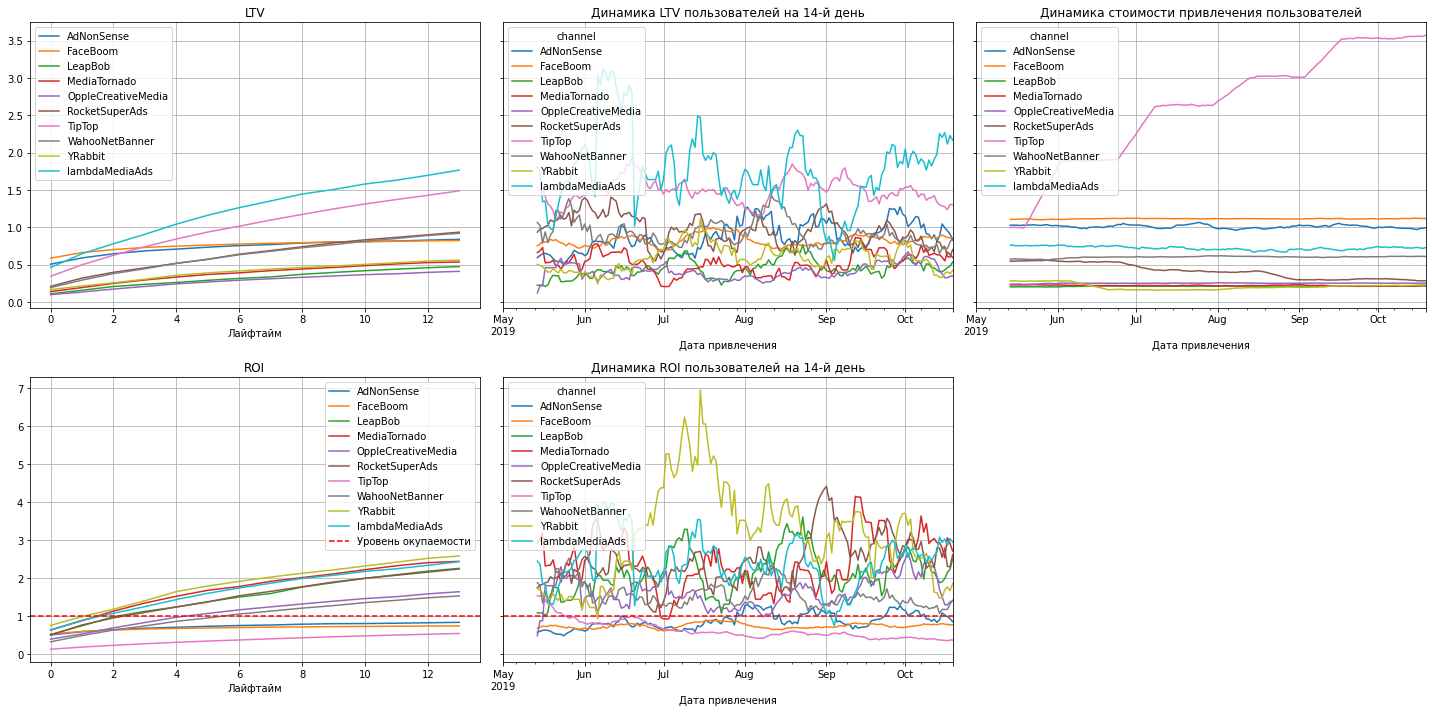

In [46]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, 
    orders,
    datetime(2019, 11, 1).date(), 
    14,
    dimensions=['channel'])

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Наибольшая выручка принесена от пользователей, пришедших по каналу lambdaMediaAds с пиком активности на 14ый день между июнем и июлем. 

Наиболее дорогие пользователи пришли с канала TipTop, причем окупаемость по нему за 14 дней так и не вышла в плюс, к сожалению.

Наиболее высокая окупаемость на 14ый день у пользователей с канала YRabbit в промежутке июль-август. Стоит обратить внимание на канал Тип-Топ -  не самый прибыльный, но самый дорогой по привлечению клиентов.


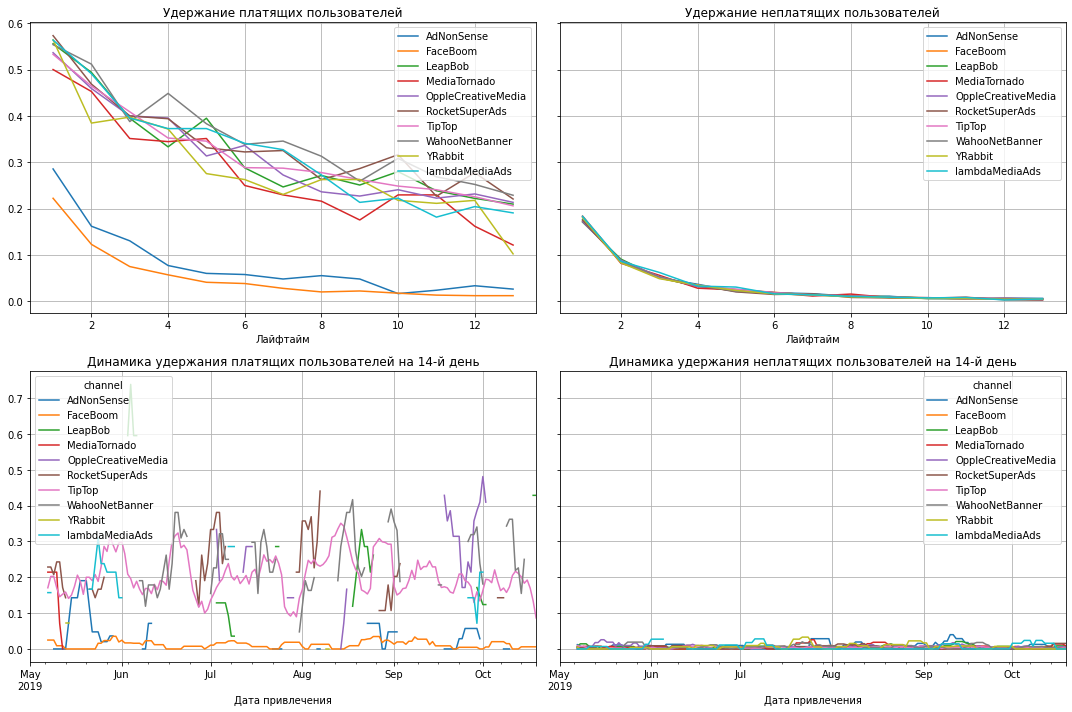

In [47]:
retention_raw, retention, retention_history = get_retention(profiles, visits, datetime(2019, 11, 1).date(), 
                                                            14, dimensions =['channel'])
plot_retention(retention, retention_history, 14) 

Выше показаны графики удержания по каналам. Видим, что пользователи с канала Фейсбум долго не задерживаются, таких пользователей остается меньше всех других пользователей, а к 14-дню и вовсе почти все уходят. 

По всем остальным каналам довольно неплохая динамика удержания.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Общий вывод:**

**1)** ***Саммэри по данным***:

- исправила тип данных в колонках
- проверила данные на наличие пропусков
- проверила данные на наличие дубликатов
- привела названия колонок к общему виду - нижнему регистру

Благодарю за качественно подготовленные данные, в целом, пропуски и дубликаты не были обнаружены.

**2)** ***Исследование***:

1) Впервые пользователей привлекли 1 мая 2019 года, ими стали 909 человек. Последнее привлечение пользователей состоялось 27 октября того же года - 1087 чел.

2) Наибольшая доля покупающих пользователей пришло из США - именно оттуда пришло более 6.9% всех пользователей, которые когда-то что-то купили в приложении. Окупаемость пользователей USA к 14-му дню снижается стремительнее остальных стран. Стоит обратить внимание на вложенные средства и способ привлечения клиентов из США - не самые прибыльные, но самые дорогие клиенты. Их много, но покупки они совершают не самые дорогостоящие.

3) Анализ показал, что доля пользователей на Маке самая маленькая из всех пользователей, но с самым высоким кол-вом покупателей, что положительное явление. Но так же стоит отметить, что такие пользователи очень дорогие и не окупаются, несмотря на то, что являются самыми многочисленными и прибыльными. Важно проверить как именно работает реклама у пользователей МАК, чтобы снизить такие высокие издержки.

А вот с Айфоном наоборот - самая большая популяция пользователей, очень высокие затраты на привлечение (как и у Мака), такой низкий уровень покупателей и нулевая окупаемость. Возможно, пользователи сталкиваются с проблемами при оплате, проверьте данную гипотезу.

4) Наиболее высокий уровень выручки получен от пользователей с США. Стоимость привлечения пользователей США выглядит чрезмерно высокой по сравнению с привлечением пользователей из других стран - несмотря на то, что выручка по ним выше всех, такая реклама совсем не окупается за 2 недели. Стоит срочно обратить внимание на вложенные средства и способ привлечения клиентов из США - самые дорогие клиенты, вложенные средства по которым не окупаются. Нужно либо пересмотреть рекламную кампанию, либо стимулировать их на большее совершение покупок. Реклама окупается во всех странах кроме США, лидируют пользователи UK.

5) Статистика показывает, что больше всего покупателей пришло через рекламный источник под названием lambdaMediaAds - его маркетологи отлично стимулируют привлечение пользователей, желающих что-то купить -  до 3% от всех пользователей каждый, но при этом целых 10-11% от всех купивших. 


Более половины от всех вложений в рекламу приходится на канал TipTop - его пользователи самые дорогие, причем окупаемость по нему за 14 дней так и не вышла в плюс. Максимальные затраты по рекламе были в сентябре-октябре 2019 года, хотя максимальная выручка на 14-ый день пользователя зафиксирована летом. Необходимо проанализировать, почему затраты осени не принесли такого большого дохода, как рекламные кампании, выпущенные летом. Наиболее  к сожалению. Наиболее высокая окупаемость на 14ый день у пользователей с канала YRabbit в промежутке июль-август. Поэтому, стоит обратить внимание на канал Тип-Топ - не самый прибыльный, но самый дорогой по привлечению клиентов и так же на Фейсбум - по нему так же высокие вложения в рекламу, но пользователи долго не задерживаются, таких пользователей остается меньше всех других пользователей, а к 14-дню и вовсе почти все уходят.

4) В основном, пользователи активно конвертировались в покупателей начиная с 6-го дня. Это логично - пользователи успели попользоваться приложением почти неделю и смогли оценить, нужно ли им приложение и хотят ли они в нем совершать покупки. К 14-му дню пользования приложения неплатящих пользователей почти не осталось. Вероятно, именно после 7-14 дня нужно принимать решение о покупке подписки и поэтому неплатящие клиенты уходят. Максимальная конверсия на 14-ый день была с июня по июль 2017, что показывает нам и график LTV. Проанализируйте, чем рекламные кампании этого периода отличаются от других.

  
  Подводя итог, хочу отметить, что реклама не окупается по пользователям с Айфона и Мак, пришедшим из США по каналам Тип-Топ и Фейсбум.

Через канал TipTop пришли самые дорогие клиенты, совершившие самые дорогие покупки, но таких клиентов мало - возможно, стоит пересмотреть рекламную кампанию, чтобы уменьшить стоимость привлечения, и при этом рекламировать более доступные к покупке "плюшки", чтобы увеличить кол-во покупателей.
  
  Так же, проанализировать рекламу в США -  клиенты оттуда самые прибыльные, но самые дорогие по привлечению. Проверьте, нет ли проблем с оплатой и конвертацией валюты в приложении при предварительной оценке покупки, т.к. таких пользователей большинство, а вот конвертация в покупателей очень низкая.
  
  Так же рекомендую проанализировать платформу Андроид-нет ли технических сбоев, когда заходишь с данной платформы - в мае по окупаемости андроид лидировал, но к осени окупаемость стала сильно снижаться и даже не всегда реклама была окупаема. То же касается и проверки работы на Айфоне - самая большая популяция пользователей и такой низкий уровень покупателей и окупаемости. Скорее всего, пользователи сталкиваются с проблемами при оплате.
  